In [1]:
import pandas as pd
database = pd.read_excel('database_TCC.xlsx')
database

,CASES,A,E,Area,N,hconv,Nu,Tmax,Rt,UA,Afin
0,1,25,1,0.260047,11,27.20,78.62,67.67,1.638,0.610501,0.02103
1,3,25,1,0.118203,5,35.45,102.00,126.85,2.595,0.385356,0.01087
2,5,25,2,0.378251,8,29.88,91.57,72.71,1.976,0.506073,0.01694
3,7,25,3,0.780142,11,10.00,31.00,162.85,4.164,0.240154,0.02370
4,9,25,3,0.354610,5,29.00,88.97,94.85,2.869,0.348554,0.01200
5,11,35,1,0.189125,8,31.60,96.90,61.15,1.421,0.703730,0.02220
6,13,35,2,0.520095,11,20.15,61.80,63.03,1.564,0.639386,0.03170
7,15,35,2,0.236407,5,30.40,93.30,77.35,2.101,0.475964,0.01560
8,17,35,3,0.567376,8,25.10,76.90,63.25,1.591,0.628536,0.02500
9,2,25,1,0.189125,8,32.08,98.34,76.30,1.946,0.513875,0.01600


In [2]:
database = database[['A','E','N','Nu']]

In [3]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()
standardscaler.fit(database)
data = standardscaler.transform(database)
database = pd.DataFrame(data,columns=database.columns)

In [4]:
import pickle
pickle.dump(standardscaler, open('standard_scaler_Nu.pkl','wb'))

In [4]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,max_error

def split_x_and_y(database,x,y):
  dataset_x = database[x]
  dataset_y = database[y]
  return dataset_x,dataset_y


def scores(Y_true, Y_predicted):
  r2 = r2_score(Y_true, Y_predicted)
  meansquarederror = mean_squared_error(Y_true, Y_predicted)
  meanabsoluteerror = mean_absolute_error(Y_true, Y_predicted)
  maxerror = max_error(Y_true, Y_predicted)

  print('r2:',r2,'meansquarederror:',meansquarederror,'meanabsoluteerror:',meanabsoluteerror,'maxerror:',maxerror)
  return r2,meansquarederror,meanabsoluteerror,maxerror

# Decision Tree Regressor

In [5]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.tree import DecisionTreeRegressor,plot_tree
DTR = DecisionTreeRegressor(random_state=100)
DTR.fit(dataset_x,dataset_y)
DTR.score(test_x,test_y)

0.9897242898141063

In [12]:
DTR.feature_importances_

array([0.05821648, 0.33288972, 0.6088938 ])

In [10]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = DTR.predict(test_x)
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

array([[ 25. ,   1. ,   8. , 102. ],
       [ 25. ,   2. ,   5. ,  93.3]])

In [9]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = test_y
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 98.34],
       [25.  ,  2.  ,  5.  , 89.62],
       [35.  ,  3.  , 11.  , 31.47]])

In [11]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.9897242898141063 meansquarederror: 9.052966666666642 meanabsoluteerror: 2.6033333333333317 maxerror: 3.6799999999999926


(0.9897242898141063, 9.052966666666642, 2.6033333333333317, 3.6799999999999926)

In [12]:
import pickle
pickle.dump(DTR, open('Decision_Tree_Regressor_Nu.pkl', 'wb'))

In [20]:
# import matplotlib.pyplot as plt
# fig = plt.figure(figsize=(25,20))
# _ = plot_tree(DTR, 
#                    feature_names=dataset_x.columns, 
#                    filled=True)

# Linear Regression

In [10]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(dataset_x,dataset_y)
LR.score(test_x,test_y)

0.8326467092134622

In [13]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(4,interaction_only=False,include_bias=False)
LR = LinearRegression()

dataset_x_transformed = poly.fit_transform(dataset_x)
test_x_transformed = poly.fit_transform(test_x)

LR.fit(dataset_x_transformed,dataset_y)
LR.score(test_x_transformed,test_y)

0.96034797005603

In [14]:
import pickle
pickle.dump(LR, open('Linear_Regression_with_Poly_Nu.pkl', 'wb'))

# MLP

In [39]:
dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

0.8570327827356772

In [60]:
from sklearn.model_selection import RandomizedSearchCV

dataset_x,dataset_y = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(max_iter=1000,random_state=100)

param_grid = {
    "activation":['logistic','tanh','relu'],
    "learning_rate":['constant','invscaling','adaptive'],
    "momentum":[0.7,0.8,0.9,0.95,0.98],
    "n_iter_no_change":[5,8,10,12,14],
    "alpha":[0.0001,0.0002,0.0004,0.0005,0.0006,0.0008]
}

random_cv = RandomizedSearchCV(
    MLP, param_grid, n_iter=250, cv=3, n_jobs=-1, random_state = 100
)

modelo = random_cv.fit(dataset_x,dataset_y)

In [61]:
modelo.best_params_

{'n_iter_no_change': 5,
 'momentum': 0.98,
 'learning_rate': 'invscaling',
 'alpha': 0.0008,
 'activation': 'logistic'}

In [62]:
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(**modelo.best_params_,max_iter=1000,random_state=100)
MLP.fit(dataset_x,dataset_y)
MLP.score(test_x,test_y)

0.8340001874556842

# Keras

In [6]:
variables,results = split_x_and_y(database,['A','E','N'],'Nu')
variables.values.shape

(12, 3)

In [37]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.python.keras.layers import Dense
import pandas as pd
from tensorflow.keras import layers

import keras
from keras.models import Sequential
from keras.layers import Dense

variables,results = split_x_and_y(database.iloc[[0,1,2,3,4,5,6,7,8]],['A','E','N'],'Nu')
test_x,test_y = split_x_and_y(database.iloc[[9,10,11]],['A','E','N'],'Nu')

model = keras.Sequential([
  layers.Dense(64, activation='sigmoid', input_shape=[len(variables.keys())]),
  # layers.Dropout(0.1),
  layers.Dense(128, activation='sigmoid'),
  layers.Dense(64, activation='sigmoid'),
  layers.Dense(16, activation='sigmoid'),
  layers.Dense(8, activation='sigmoid'),
  # layers.Dense(8, activation='relu'),
  layers.Dense(1)
])

# optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mse'])

history = model.fit(variables.values,results.values,epochs=300,validation_split=0.3)

Epoch 1/300
1/1 [==============================] - 1s 711ms/step - loss: 1.0375 - mse: 1.0375 - val_loss: 0.3022 - val_mse: 0.3022
Epoch 2/300
1/1 [==============================] - 0s 36ms/step - loss: 1.0276 - mse: 1.0276 - val_loss: 0.3076 - val_mse: 0.3076
Epoch 3/300
1/1 [==============================] - 0s 35ms/step - loss: 1.0202 - mse: 1.0202 - val_loss: 0.3153 - val_mse: 0.3153
Epoch 4/300
1/1 [==============================] - 0s 33ms/step - loss: 1.0156 - mse: 1.0156 - val_loss: 0.3246 - val_mse: 0.3246
Epoch 5/300
1/1 [==============================] - 0s 34ms/step - loss: 1.0133 - mse: 1.0133 - val_loss: 0.3345 - val_mse: 0.3345
Epoch 6/300
1/1 [==============================] - 0s 35ms/step - loss: 1.0130 - mse: 1.0130 - val_loss: 0.3437 - val_mse: 0.3437
Epoch 7/300
1/1 [==============================] - 0s 26ms/step - loss: 1.0138 - mse: 1.0138 - val_loss: 0.3510 - val_mse: 0.3510
Epoch 8/300
1/1 [==============================] - 0s 34ms/step - loss: 1.0149 - mse: 1.0

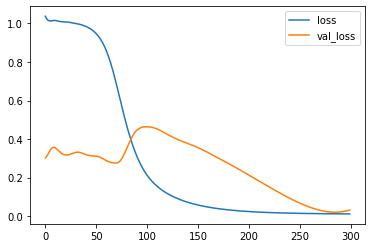

In [39]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])

In [16]:
guess = model.predict(test_x.values)
guess

1/1 [==============================] - 0s 74ms/step


array([[ 0.83856833],
       [ 0.8437473 ],
       [-1.8794724 ]], dtype=float32)

In [10]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = guess
desnormalizar

,A,E,N,Nu
9,-0.845154,-1.224745,0.000000,0.761644
10,-0.845154,0.000000,-1.224745,0.773004
11,1.183216,1.224745,1.224745,-1.022023


In [11]:
desnormalizado_teste = standardscaler.inverse_transform(desnormalizar)
desnormalizado_teste

array([[25.        ,  1.        ,  8.        , 96.31316031],
       [25.        ,  2.        ,  5.        , 96.58072486],
       [35.        ,  3.        , 11.        , 54.30246256]])

In [12]:
desnormalizar = test_x.copy()
desnormalizar['Nu'] = test_y
desnormalizar

,A,E,N,Nu
9,-0.845154,-1.224745,0.000000,0.847698
10,-0.845154,0.000000,-1.224745,0.477469
11,1.183216,1.224745,1.224745,-1.991431


In [13]:
desnormalizado_resultado = standardscaler.inverse_transform(desnormalizar)
desnormalizado_resultado

array([[25.  ,  1.  ,  8.  , 98.34],
       [25.  ,  2.  ,  5.  , 89.62],
       [35.  ,  3.  , 11.  , 31.47]])

In [29]:
scores(desnormalizado_resultado[:,-1],desnormalizado_teste[:,-1])

r2: 0.9792734994843473 meansquarederror: 18.260180064482245 meanabsoluteerror: 3.4292649169595086 maxerror: 7.015026464920979


(0.9792734994843473, 18.260180064482245, 3.4292649169595086, 7.015026464920979)

In [30]:
model.save("keras_model_Nu.h5")